1. 회귀분석
> 데이터 : 연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터세트
* 데이터 8:2로 분할 후 선형 회귀 적용하여 결정계수와 RMSE 구하기
* 데이터를 8:2로 분할 후 릿지 회귀 적용
    * 이때 alpha의 값을 0부터 1까지 0.1 단위로 모두 탐색하여 결정계수가 가장 높을 때의 alpha를 찾고, 해당 alpha로 다시 모델을 학습하여 결정계수와 RMSE 구하기
* 데이터를 8:2로 분할 후 라쏘 회귀 적용
    * 이때 alpha의 값을 0부터 1까지 0.1 단위로 모두 탐색하여 결정계수가 가장 높을 때의 alpha를 찾고, 해당 alpha로 다시 모델을 학습하여 결정계수와 RMSE 구하기

#### 데이터 8:2로 분할 후 선형 회귀 적용하여 결정계수와 RMSE 구하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


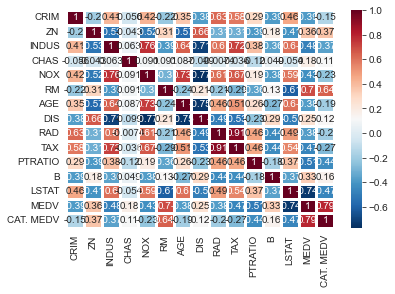

In [30]:
import pandas as pd
import numpy as np

df = pd.read_excel('./data/boston.xls')
df.info()

# ZN : 설명변수, MEDV : 종속변수
df1 = df[['ZN', 'MEDV']]
df1

# 막간 EDA
df_corr = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data = df_corr, annot = True, xticklabels = df_corr.columns, yticklabels = df_corr.columns, cmap = 'RdBu_r', linewidth = 3)
plt.show()

In [31]:
# 데이터 8:2로 분할하기
from sklearn.model_selection import train_test_split

x = pd.DataFrame(df['CAT. MEDV'])
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=731)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 1) (102, 1) (404,) (102,)


In [32]:
# 선형 회귀 적용
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [33]:
# 결정계수, RMSE 구하기
from sklearn.metrics import mean_squared_error

print('결정계수 : ', LR.score(x_test, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, LR.predict(x_test))))

결정계수 :  0.6634188586843541
RMSE :  5.847414901199949


#### 데이터를 8:2로 분할 후 릿지 회귀 적용
    * 이때 alpha의 값을 0부터 1까지 0.1 단위로 모두 탐색하여 결정계수가 가장 높을 때의 alpha를 찾고, 해당 alpha로 다시 모델을 학습하여 결정계수와 RMSE 구하기

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

alpha = np.arange(0, 1.1, 0.1)

ridge = Ridge()
param_grid = {'alpha' : alpha}
ridge_model = GridSearchCV(ridge, param_grid = param_grid)
ridge_model.fit(x_train, y_train)

print(ridge_model.best_params_)
print('릿지 회귀 결정 계수 : ', ridge_model.score(x_test, y_test))
print('릿지 회귀 RMSE : ', np.sqrt(mean_squared_error(y_test, ridge_model.predict(x_test))))

{'alpha': 1.0}
릿지 회귀 결정 계수 :  0.6610162139539075
릿지 회귀 RMSE :  5.868248328449809


#### 데이터를 8:2로 분할 후 라쏘 회귀 적용
    * 이때 alpha의 값을 0부터 1까지 0.1 단위로 모두 탐색하여 결정계수가 가장 높을 때의 alpha를 찾고, 해당 alpha로 다시 모델을 학습하여 결정계수와 RMSE 구하기

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

alpha = np.arange(0, 1.1, 0.1)

lasso = Lasso()
param_grid = {'alpha' : alpha}
lasso_model = GridSearchCV(lasso, param_grid = param_grid)
lasso_model.fit(x_train, y_train)

print(lasso_model.best_params_)
print('라쏘 회귀 결정 계수 : ', lasso_model.score(x_test, y_test))
print('라쏘 회귀 RMSE : ', np.sqrt(mean_squared_error(y_test, lasso_model.predict(x_test))))

{'alpha': 0.1}
라쏘 회귀 결정 계수 :  0.6577803021094323
라쏘 회귀 RMSE :  5.896190715197807


/Users/dmis/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/dmis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/dmis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.082e+03, tolerance: 2.570e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

2. 다항 회귀분석 시각화 (Skip)

3. ANOVA
> 데이터 : avocado.csv
* 범주형 변수 2개, 연속형 변수 1개
* 이원분산분석 실시, 통계표 작성

In [55]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df = df[['AveragePrice', 'type', 'region']]
df = df[(df['region'] == 'Boston') | (df['region'] == 'Orlando') | (df['region'] == 'Chicago')].reset_index(drop = True)
df.head()

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston


#### 분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A, B의 영향을 알아보기 위해 사용되는 검증 방법이다.
#### 가설은 다음과 같이 세울 수 있다.
1. 상호작용효과 검정에 대한 가설
    * 귀무가설 : region과 type 간에는 상호작용 효과가 없다.
    * 대립가설 : region과 type 간에는 상호작용 효과가 있다.
2. 주효과 검정에 대한 가설
    * 귀무가설1 : region 종류에 따른 price 차이는 존재하지 않는다.
    * 대립가설1 : region 종류에 따른 price 차이는 존재한다.
    * 귀무가설2 : type 종류에 따른 price 차이는 존재하지 않는다.
    * 대립가설2 : type 종류에 따른 price 차이는 존재한다.

In [60]:
# 1. 상호작용효과 검정
# 변수들을 series로 분해
AveragePrice = df['AveragePrice']
type = df['type']
region = df['region']

# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm # lm : 등분산성 확인
formula = 'AveragePrice ~ C(type) * C(region)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


#### 결과 해석
1. 상호작용효과에 대한 검정
* C(type):C(region)에서 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고, 대립가설을 채택한다.
    * 즉, type과 region 간에는 상호작용 효과가 있다.
2. 주효과 검정
* C(type), C(region)모두 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고, 대립가설을 채택한다.
    * 즉, type과 region 모두 각 종류에 따라 AveragePrice에 영향을 미친다고 할 수 있다.